## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [1]:
# code 

n = 200

def factorial_int(n):
    solution = 1
    for i in range(1, n + 1):
        solution *= i
    return solution

n = 200
fact_integ = factorial_int(n)


def factorial_float(n):
    solution2 = 1.0
    for i in range(1, n + 1):
        solution2 *= i
    return solution2

n = 200
fact_floati = factorial_float(n)


print(f"The factorial of {n} using the integer function: {fact_integ}")
print(f"The factorial of {n} using the floating-point function: {fact_floati}")


# Explanation: The calculation of 200 factorial using the integer funcion returns a value. However the calculation of 200
#    factorial using the float function returns infinity because python cannot handle approximating tons of numbers with
#    decimals leading to rounding and precision errors.


The factorial of 200 using the integer function: 788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
The factorial of 200 using the floating-point function: inf


**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [2]:
# code

def f(x):
    return x * (x - 1)

def approx_derivative(x, delta):
    return (f(x + delta) - f(x)) / (delta)

x = 1
delta_first = 10**(-2)

print(f"Delta_First: {approx_derivative(x, delta_first)}")


delta_values = [10**-4, 10**-6, 10**-8, 10**-10, 10**-12, 10**-14]


for delta in delta_values:
    approxima_der = approx_derivative(x, delta)
    print(f"Delta: {delta}, Approximate Derivative: {approxima_der}")
  
    
print(approxima_der)
print(f"Delta: {delta:.0e}, Approximate Derivative: {approx_derivative}")


# Explanation: 
#  The two solutions do not agree perfectly because the program is approximating the difference between two points using small 
#     increments. The increments lead to calculation errors. 
#  The accuracy gets better then gets worse again because of rounding.


Delta_First: 1.010000000000001
Delta: 0.0001, Approximate Derivative: 1.0000999999998899
Delta: 1e-06, Approximate Derivative: 1.0000009999177333
Delta: 1e-08, Approximate Derivative: 1.0000000039225287
Delta: 1e-10, Approximate Derivative: 1.000000082840371
Delta: 1e-12, Approximate Derivative: 1.0000889005833413
Delta: 1e-14, Approximate Derivative: 0.9992007221626509
0.9992007221626509
Delta: 1e-14, Approximate Derivative: <function approx_derivative at 0x000001949736E7A0>


### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [3]:
# code

import numpy as np

a = 0
b = 2
exact_value = 4.4

def s(x):
    return x**4 - 2*x + 1


def simp_rule(a, b, n):
    if n % 2 == 1: 
        n += 1
    
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    func = s
    
    equation = (h/3) * (func(a) + func(b))
    
    odd_sum = 0
    even_sum = 0
    
    for k in range(1, n, 2):  
        odd_sum +=  func(a + k*h)
                           
    for k in range(2, n, 2):  
        even_sum += func(a + k*h)
        
        
    equation = (h/3) * (func(a) + func(b) + 4*odd_sum + 2*even_sum) 
    
    return equation


n_values = [10, 100, 1000]
results = []

for n in n_values:
    equation_value = simp_rule(a, b, n)
    fractional_error = abs((equation_value - exact_value) / exact_value)
    results.append((n, equation_value, fractional_error))


for n, equation_value, fractional_error in results:
    print(f"n = {n}: Simpson's Solution = {equation_value}, Fractional error = {fractional_error}")


n = 10: Simpson's Solution = 4.400426666666667, Fractional error = 9.696969696972666e-05
n = 100: Simpson's Solution = 4.400000042666668, Fractional error = 9.696969893724372e-09
n = 1000: Simpson's Solution = 4.400000000004267, Fractional error = 9.697293473271367e-13


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

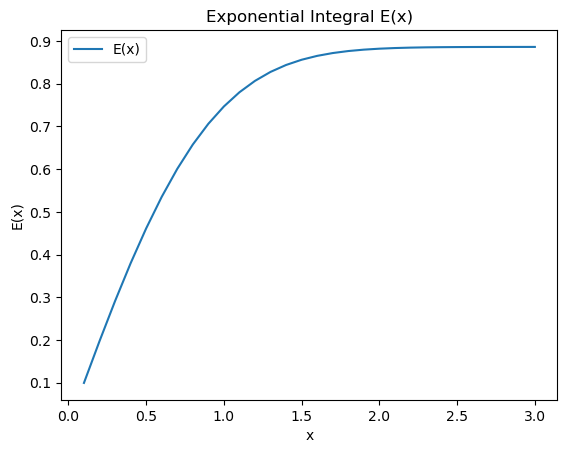

In [4]:
# code

import numpy as np
import matplotlib.pyplot as plt

def integrand(t):
    return np.exp(-t**2) 

def trapez_integral(a, b, n):
    
    x_nums = np.linspace(a, b, n+1)
    y_nums = np.array([integrand(x) for x in x_nums])
    
    
    h = (b - a) / n
    ana_integ = (h/2) * (y_nums[0] + y_nums[-1] + 2 * np.sum(y_nums[1:-1]))
    return ana_integ


x_values = np.arange(0.1, 3.1, 0.1) 
E_values = []


for x in x_values:
    
    solution_ana = trapez_integral(0.0001, x, 1000)
    E_values.append(solution_ana)


plt.plot(x_values, E_values, label="E(x)")
plt.xlabel("x")
plt.ylabel("E(x)")
plt.title("Exponential Integral E(x)")
plt.legend()


plt.show()